In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import os
print(os.getcwd())


c:\Users\TienLN\Downloads\DTB\296


In [14]:
payments = pd.read_csv(r'C:\Users\TienLN\Downloads\DTB\296\olist_order_payments_dataset.csv')
print(payments.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [15]:
print(payments.info())
print(payments.describe())
print(payments['payment_type'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1

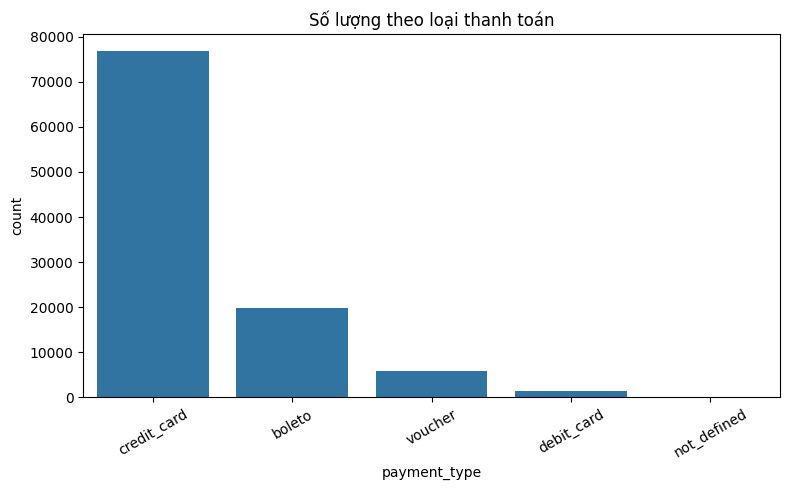

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=payments, x='payment_type', order=payments['payment_type'].value_counts().index)
plt.title("Số lượng theo loại thanh toán")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

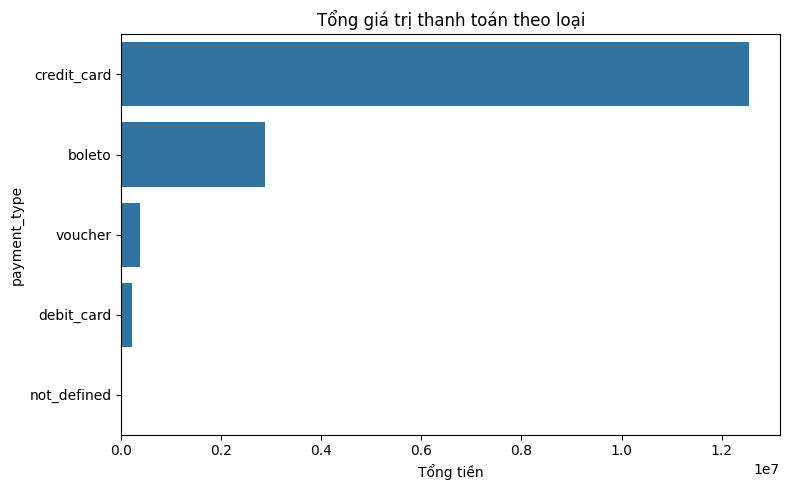

In [17]:
payment_totals = payments.groupby("payment_type")["payment_value"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_totals.values, y=payment_totals.index)
plt.title("Tổng giá trị thanh toán theo loại")
plt.xlabel("Tổng tiền")
plt.tight_layout()
plt.show()


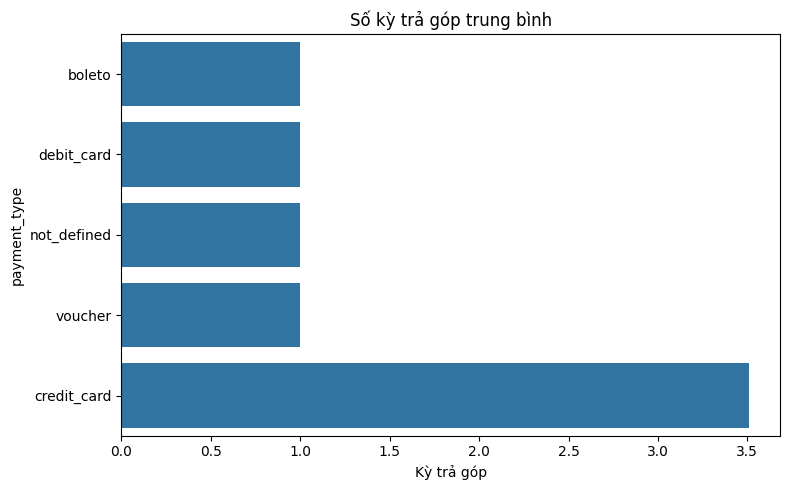

In [18]:
installments_avg = payments.groupby("payment_type")["payment_installments"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=installments_avg.values, y=installments_avg.index)
plt.title("Số kỳ trả góp trung bình")
plt.xlabel("Kỳ trả góp")
plt.tight_layout()
plt.show()


In [19]:
multi_payment_orders = payments.groupby("order_id").size()
multi_payment_orders = multi_payment_orders[multi_payment_orders > 1]

print(f"Có {len(multi_payment_orders)} đơn hàng dùng nhiều hơn 1 phương thức thanh toán.")


Có 2961 đơn hàng dùng nhiều hơn 1 phương thức thanh toán.


In [20]:
summary = payments.groupby("payment_type").agg(
    total_orders=('order_id', 'count'),
    total_payment=('payment_value', 'sum'),
    avg_installments=('payment_installments', 'mean'),
    max_payment=('payment_value', 'max')
).sort_values(by="total_payment", ascending=False)

print(summary)


              total_orders  total_payment  avg_installments  max_payment
payment_type                                                            
credit_card          76795    12542084.19          3.507155     13664.08
boleto               19784     2869361.27          1.000000      7274.88
voucher               5775      379436.87          1.000000      3184.34
debit_card            1529      217989.79          1.000000      4445.50
not_defined              3           0.00          1.000000         0.00
